In [18]:
from keras.datasets import fashion_mnist

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [19]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
print('Training data shape: ', train_X.shape, train_Y.shape)

print('Testing data shape: ', test_X.shape, test_Y.shape)

Training data shape:  (60000, 28, 28) (60000,)
Testing data shape:  (10000, 28, 28) (10000,)


In [21]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs: ', nClasses)
print('Output classes: ', classes)

Total number of outputs:  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


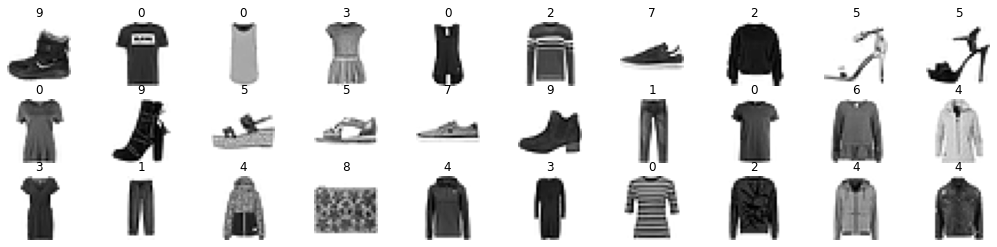

In [22]:
_, axes = plt.subplots(nrows=3, ncols=10, figsize=(18, 4))
for ax, image, label in zip(axes.flatten(), train_X, train_Y):
    ax.set_axis_off()
    ax.imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r)
    ax.set_title(label)

![](../example/fashion_mnist.png)

* 0 - t-shirt/top 
* 1 - trousers
* 2 - pullover
* 3 - dress
* 4 - coat
* 5 - sandal
* 6 - shirt
* 7 - sneaker
* 8 - bag
* 9 - ankle boot


In [23]:
#convert 2d input to 3d
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [24]:
print(f'Training data range: from {train_X.min()} to {train_X.max()}')

print(f'Testing data range: from {test_X.min()} to {test_X.max()}')

Training data range: from 0 to 255
Testing data range: from 0 to 255


In [25]:
#type converting and scaling to 0-1
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [26]:
print(f'Training data range: from {train_X.min()} to {train_X.max()}')

print(f'Testing data range: from {test_X.min()} to {test_X.max()}')

Training data range: from 0.0 to 1.0
Testing data range: from 0.0 to 1.0


In [27]:
# Change the labels from categorical to OHE
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

train_Y_one_hot[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [28]:
from sklearn.model_selection import train_test_split

train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

train_X.shape, valid_X.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))